# 📘 Proyecto de Aula - Fundamentos en Ciencia de Datos

*"Análisis del comportamiento e identificación de patrones en el valor de las donaciones de una empresa del sector cárnico mediante técnicas de ciencia de datos"*

**Objetivo**

•	Detectar y analizar valores atípicos en la base de datos para mejorar la calidad de la información, reducir sesgos y garantizar mayor confiabilidad en los resultados del procesamiento y modelado posterior.

In [12]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:

# Leer el archivo CSV (usa el nombre correcto)
df = pd.read_csv("df_nclean.csv")

# **7. Detección y análisis de atípicos**

Graficos de Box-Plot para la interpretación y análisis.

📊 Distribución original de la columna 'tipo':
tipo
destruccion    1743381
donacion         63340
0                   79
Name: count, dtype: int64
Total de registros: 1,806,869

📈 Registros en df_comparativo por tipo:
tipo_grafico
TOTAL          1806869
DESTRUCCIÓN    1743381
DONACIÓN         63340
Name: count, dtype: int64


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\2561133004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativo, x='tipo_grafico', y=col,


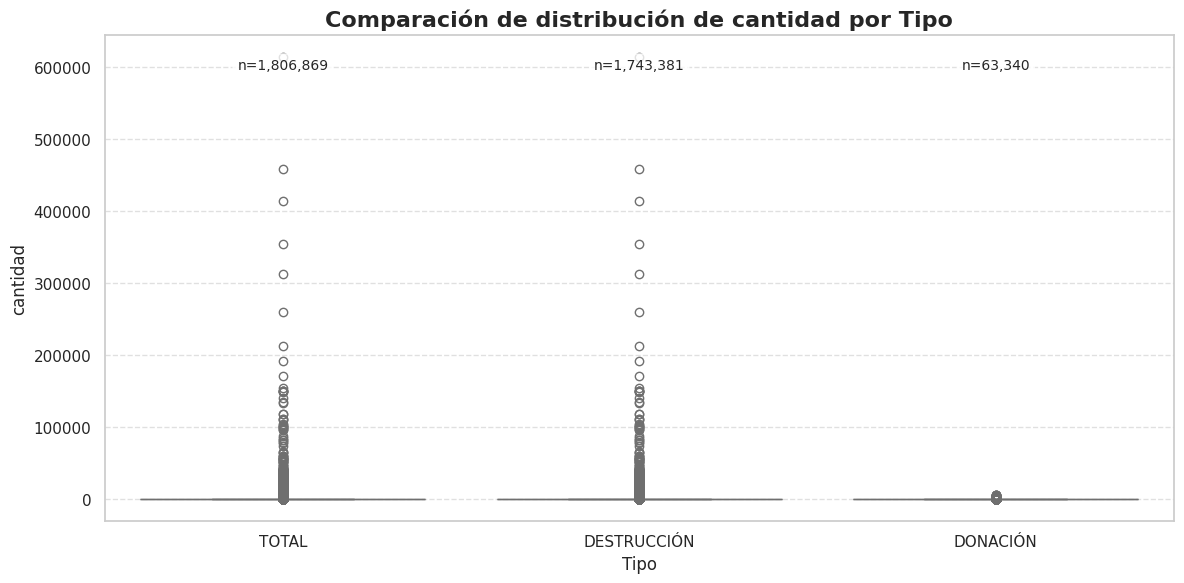


📊 Estadísticas comparativas para cantidad:
                  count   mean      std  min  25%  50%   75%       max
tipo_grafico                                                          
DESTRUCCIÓN   1743381.0  16.12  1004.98  0.0  1.0  2.0   6.0  613569.0
DONACIÓN        63340.0  21.58   108.97  0.0  1.0  4.0  11.0    5990.0
TOTAL         1806869.0  16.31   987.37  0.0  1.0  2.0   6.0  613569.0
------------------------------------------------------------


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\2561133004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativo, x='tipo_grafico', y=col,


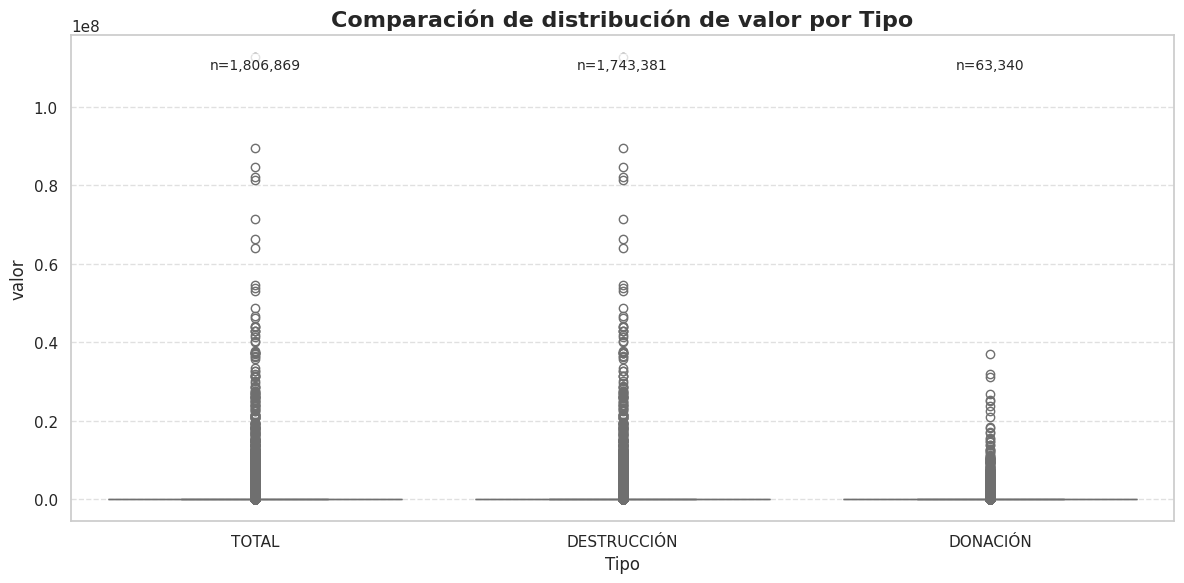


📊 Estadísticas comparativas para valor:
                  count       mean        std   min      25%      50%  \
tipo_grafico                                                            
DESTRUCCIÓN   1743381.0   44323.37  336594.50   1.0  6425.00  14326.0   
DONACIÓN        63340.0  114794.71  590137.78  22.0  4918.75  13200.0   
TOTAL         1806869.0   46807.14  348921.18   1.0  6386.00  14298.0   

                  75%          max  
tipo_grafico                        
DESTRUCCIÓN   35656.0  112699156.0  
DONACIÓN      51496.5   36913500.0  
TOTAL         36015.0  112699156.0  
------------------------------------------------------------


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\2561133004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativo, x='tipo_grafico', y=col,


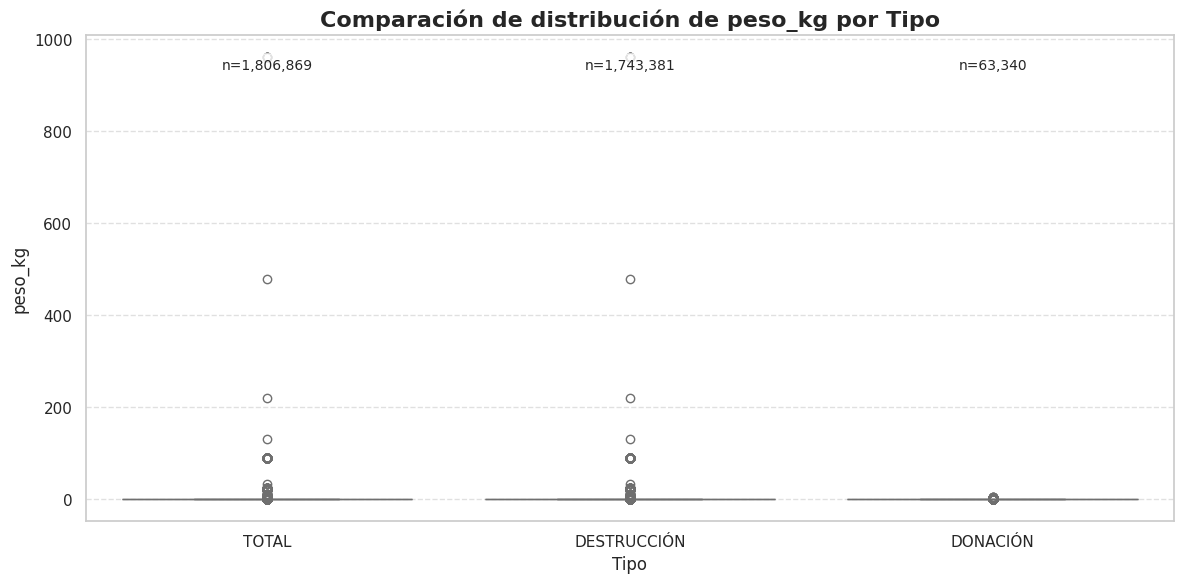


📊 Estadísticas comparativas para peso_kg:
                  count  mean   std  min   25%   50%   75%     max
tipo_grafico                                                      
DESTRUCCIÓN   1743381.0  0.59  1.73  0.0  0.25  0.45  0.68  960.00
DONACIÓN        63340.0  0.38  0.31  0.0  0.17  0.30  0.48    5.24
TOTAL         1806869.0  0.59  1.71  0.0  0.25  0.45  0.68  960.00
------------------------------------------------------------


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19540\2561133004.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativo, x='tipo_grafico', y=col,


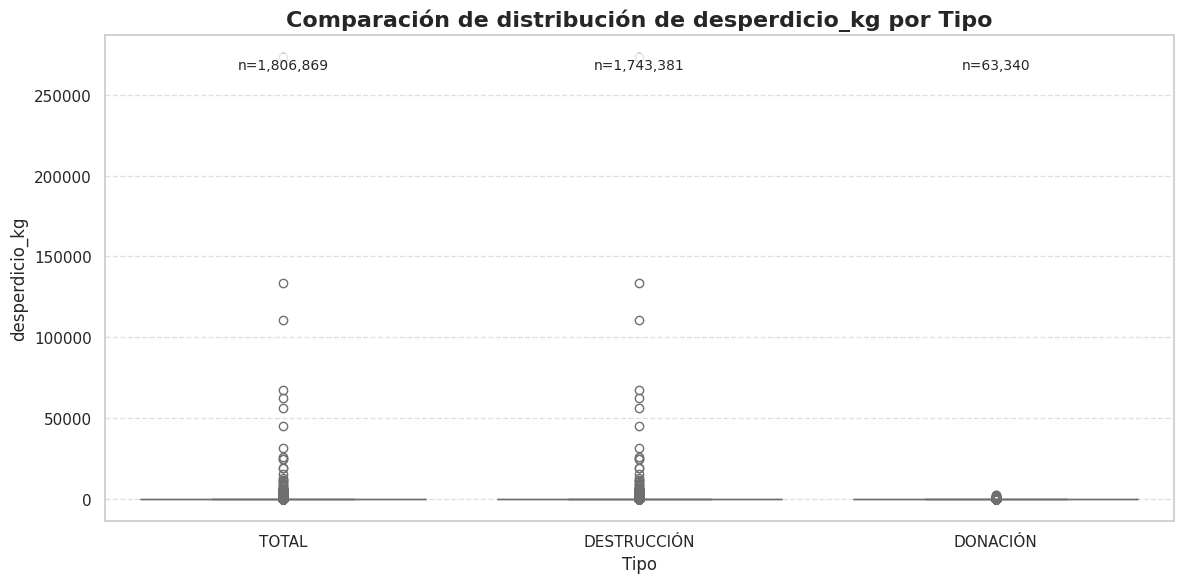


📊 Estadísticas comparativas para desperdicio_kg:
                  count  mean     std  min   25%   50%   75%        max
tipo_grafico                                                           
DESTRUCCIÓN   1743381.0  4.20  267.38  0.0  0.50  1.20  3.00  273336.00
DONACIÓN        63340.0  8.33   41.72  0.0  0.44  1.16  3.86    2684.85
TOTAL         1806869.0  4.35  262.76  0.0  0.50  1.20  3.00  273336.00
------------------------------------------------------------


In [ ]:
# Configuración de gráficos
# Variables a graficar
variables = ["cantidad", "valor", "peso_kg", "desperdicio_kg"]

# Verificar que las variables existan
for col in variables:
    if col not in df.columns:
        print(f"⚠️ La columna '{col}' no existe en el DataFrame, se omite.")
        variables.remove(col)

# Verificar la distribución original de 'tipo'
print("📊 Distribución original de la columna 'tipo':")
print(df['tipo'].value_counts())
print(f"Total de registros: {len(df):,}")

# Crear DataFrame para TOTAL (todo el dataset)
df_total = df.copy()
df_total['tipo_grafico'] = 'TOTAL'

# Crear DataFrame para DESTRUCCIÓN
df_destruccion = df[df['tipo'] == 'destruccion'].copy()
df_destruccion['tipo_grafico'] = 'DESTRUCCIÓN'

# Crear DataFrame para DONACIÓN
df_donacion = df[df['tipo'] == 'donacion'].copy()
df_donacion['tipo_grafico'] = 'DONACIÓN'

# Combinar todos los DataFrames
df_comparativo = pd.concat([df_total, df_destruccion, df_donacion], ignore_index=True)

print(f"\n📈 Registros en df_comparativo por tipo:")
print(df_comparativo['tipo_grafico'].value_counts())

# Graficar comparación side-by-side
for col in variables:
    plt.figure(figsize=(12, 6))
    
    # Boxplot comparativo
    sns.boxplot(data=df_comparativo, x='tipo_grafico', y=col, 
                palette=['#87CEEB', '#FFB6C1', '#98FB98'],
                order=['TOTAL', 'DESTRUCCIÓN', 'DONACIÓN'])
    
    plt.title(f"Comparación de distribución de {col} por Tipo", fontsize=16, fontweight='bold')
    plt.xlabel("Tipo", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    # Añadir número de observaciones
    for i, tipo in enumerate(['TOTAL', 'DESTRUCCIÓN', 'DONACIÓN']):
        n = len(df_comparativo[df_comparativo['tipo_grafico'] == tipo])
        plt.text(i, plt.ylim()[1] * 0.95, f'n={n:,}', 
                ha='center', va='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas comparativas en consola
    print(f"\n📊 Estadísticas comparativas para {col}:")
    print(df_comparativo.groupby('tipo_grafico')[col].describe().round(2))
    print("-" * 60)

🔹 Observaciones importantes:

De acuerdo con las gráficas presentadas del Box Plot, se podría decir que las variables "cantidad", "valor" y "donación_kg", evidencian un gran número de outliers, sin embargo con los análsis hechos anteriormente, sabemos que estas variables están altamente relacionadas y según sus estadísticos, era de esperarse este resultado. Por otro lado, la variable "peso_kg" presenta outliers, pero no son tan representativos en comparación con las demás variables, con una notoria cola hacia la derecha.

Estos outliers, son lógicos en su escencia, ya que los valores que pueden tomar cada una de las variables, por ejemplo "valor", son en su mayoría pequeños y muy pocos con valores muy altos, y este comportamiento se ve reflejado en el box plot, con conatados datos muy altos, que halan la gráfica hacia la derecha.

En conclusión, estos datos no serían etiquetados como outliers, ya que en el contexto se pueden presentar estos valores. Por ejemplo, las donaciones en su mayoría son valores muy pequeños, sin embargo hay situaciones, como en temporada, dónde las donaciones aumentan debido a la alta producción por la época del año.

Se complementa el análisis con la herramienta de DBSCAN

***DBSCAN***


🎯 DBSCAN con parámetros específicos para: TOTAL


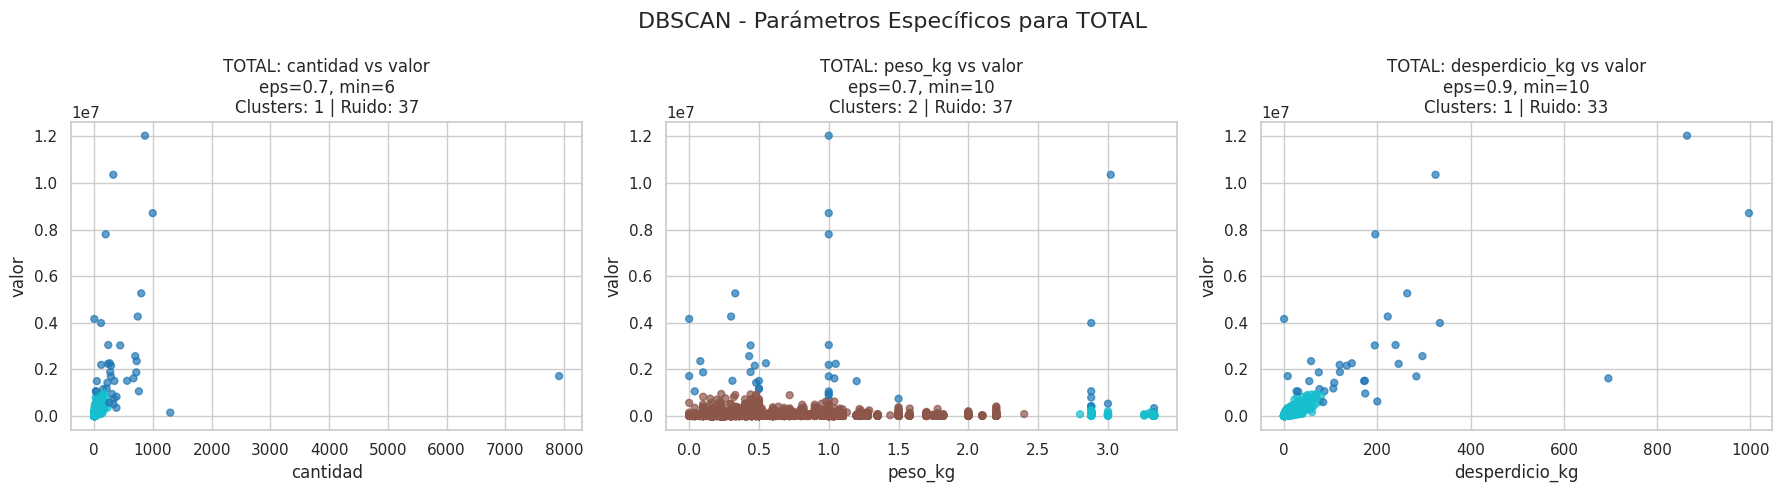


🎯 DBSCAN con parámetros específicos para: DESTRUCCIÓN


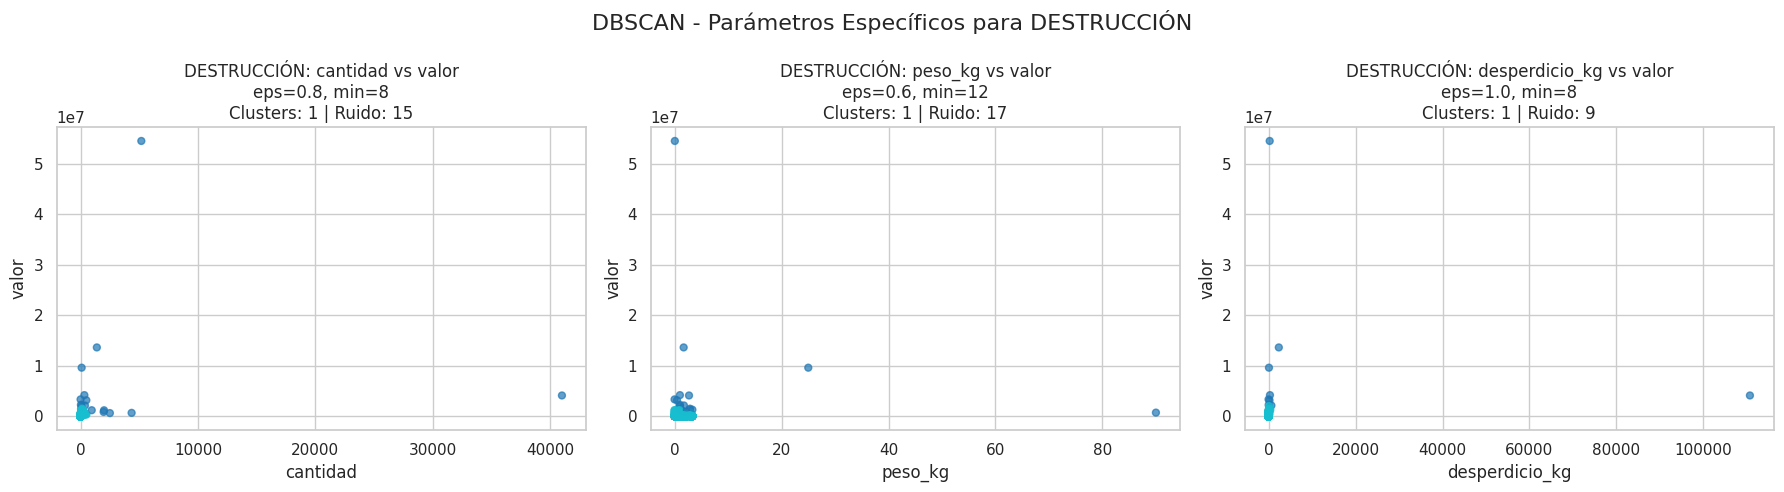


🎯 DBSCAN con parámetros específicos para: DONACIÓN


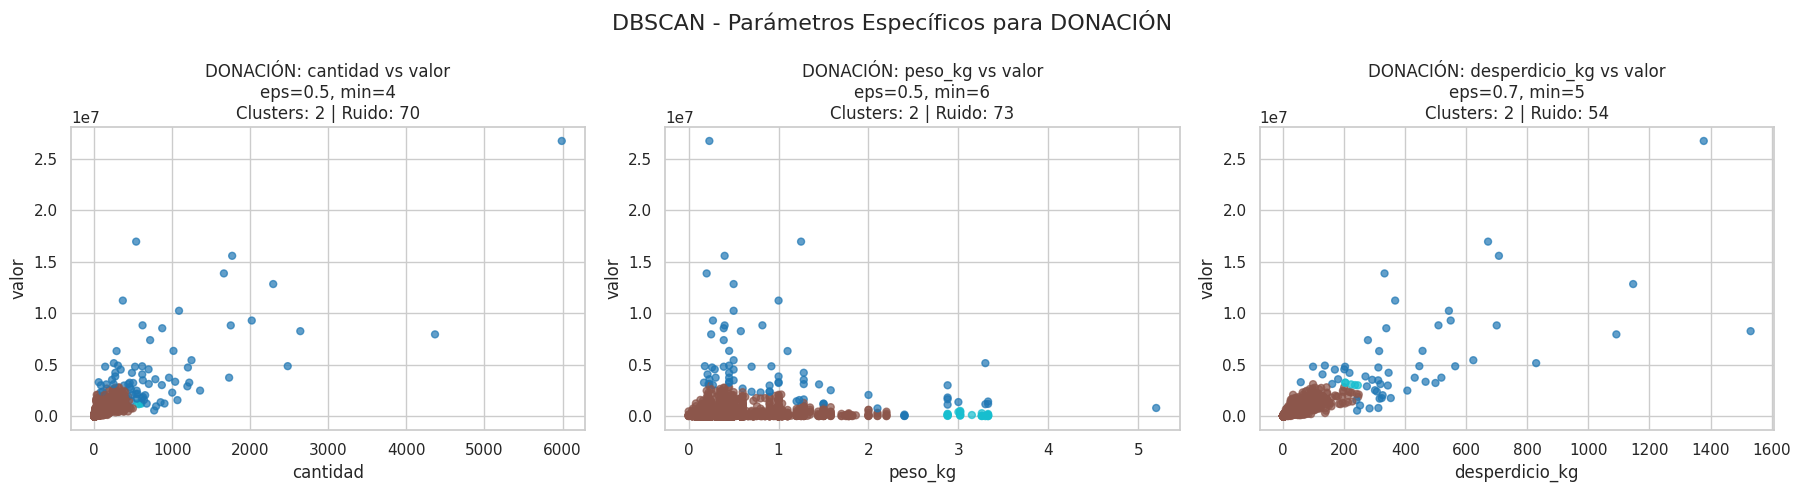

In [8]:
# ===========================================
# DBSCAN con parámetros específicos por tipo
# ===========================================

# Parámetros ajustados para cada tipo (puedes modificar según tus datos)
parametros_por_tipo = {
    'TOTAL': {
        "cantidad": {"eps": 0.7, "min_samples": 6},
        "peso_kg": {"eps": 0.7, "min_samples": 10},
        "desperdicio_kg": {"eps": 0.9, "min_samples": 10}
    },
    'DESTRUCCIÓN': {
        "cantidad": {"eps": 0.8, "min_samples": 8},
        "peso_kg": {"eps": 0.6, "min_samples": 12},
        "desperdicio_kg": {"eps": 1.0, "min_samples": 8}
    },
    'DONACIÓN': {
        "cantidad": {"eps": 0.5, "min_samples": 4},
        "peso_kg": {"eps": 0.5, "min_samples": 6},
        "desperdicio_kg": {"eps": 0.7, "min_samples": 5}
    }
}

# Crear análisis con parámetros específicos
for tipo_nombre, df_tipo in tipos_data.items():
    print(f"\n🎯 DBSCAN con parámetros específicos para: {tipo_nombre}")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, (x_col, y_col) in enumerate(pares):
        if x_col not in df_tipo.columns or y_col not in df_tipo.columns:
            continue
            
        subset = df_tipo[[x_col, y_col]].dropna()
        
        if len(subset) < 10:
            continue
            
        if len(subset) > 10000:
            subset = subset.sample(10000, random_state=42)

        X = subset.values
        X_scaled = StandardScaler().fit_transform(X)

        # Usar parámetros específicos para este tipo
        eps = parametros_por_tipo[tipo_nombre][x_col]["eps"]
        min_samples = parametros_por_tipo[tipo_nombre][x_col]["min_samples"]

        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=1)
        labels = db.fit_predict(X_scaled)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = np.sum(labels == -1)

        axes[i].scatter(
            subset[x_col],
            subset[y_col],
            c=labels,
            cmap='tab10',
            s=25,
            alpha=0.7
        )
        
        axes[i].set_title(
            f"{tipo_nombre}: {x_col} vs {y_col}\n"
            f"eps={eps}, min={min_samples}\n"
            f"Clusters: {n_clusters} | Ruido: {n_noise}"
        )
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)

    plt.suptitle(f"DBSCAN - Parámetros Específicos para {tipo_nombre}", fontsize=16)
    plt.tight_layout()
    plt.show()

🔹 Observaciones importantes:
Para el análisis del total de los datos y de la segmentaciónd e donaciones, se logra diferenciar un agrupamiento en las tres variables evidente, ya que se logran visulizar valores pequeños y altos, hay algunos datos que no logran ser diferenciados, pero la gran mayoría sí loson. En cambio, para el caso de las destrucciones no es evidente una diferenciación ya que el grupo se encuentra muy sectorizado.

Lo que lleva a analizar que esta data de destrucciones tiene complicaciones en cuanto a análisis de correlación, de linealidad y de agrupamiento.
